<a href="https://colab.research.google.com/github/AinaHerrera/ejerciciosIA/blob/main/Checkpoint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Planteamiento y encaje del dataset**
1) ¿Qué objetivo tiene este análisis?

Un mini-prototipo analítico que muestre cómo ciertos hábitos y factores de estudio se relacionan con el rendimiento. Este responde a la visión del proyecto personal: SenseAI. Centralizar materiales, hacer seguimiento del progreso y ofrecer una vista tipo “dashboard” con insights simples para orientar el aprendizaje.

2) Objetivo del notebook: Validar que un dataset educativo real puede alimentar los bloques básicos de SenseAI:

Una lectura mínima de “qué factor podría importar” (ej., horas de estudio, asistencia).
El fin no es predecir, sino entender y comunicar hallazgos sencillos que luego SenseAI podría usar en su módulo tutor o tablero.

3) ¿Por qué este dataset encaja?

El dataset de Student Performance Factors trae variables sobre hábitos y contexto (p. ej., Study_Hours, Attendance, Parental_Education, Test_Score). Eso calza con los componentes clave de SenseAI: seguimiento estudiantil y una página de resumen con gráficos simples.

4) Pregunta guía del análisis a desarrollar: “¿A más Study_Hours, mayor Test_Score?”


# **Configuración inicial**
Propósito: Cargar librerías y definir la carpeta de trabajo y añadir el path del CSV.

In [ ]:
from pathlib import Path
import textwrap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
file_path = "/content/StudentPerformanceFactors.csv"
df = pd.read_csv(file_path)
display(df.head())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **Exploración rápida**
Propósito: Ver columnas, tipos, faltantes y estadísticas básicas.
Qué revisar: Columnas disponibles, info() y describe().

In [ ]:

print("Columnas:", list(df.columns))

print("\nInfo del DataFrame:")
print(df.info())

print("\nValores faltantes por columna:")
print(df.isna().sum().sort_values(ascending=False))

print("\nEstadísticas (numéricas):")
df.describe().T


Columnas: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores  

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


# **Definir subconjuntos de columnas**
Propósito: Crear un DataFrame de trabajo mínimo (df_core) con las columnas indispensables para esta fase (scatter + media/varianza) y, opcionalmente, un df_context para una vista extra (boxplot por Attendance).

In [ ]:
core_cols = ["Hours_Studied", "Exam_Score"]           # indispensables para la pregunta guía
context_cols = ["Attendance"]                          # opcional para un boxplot simple


core_cols = [c for c in core_cols if c in df.columns]
context_cols = [c for c in context_cols if c in df.columns]

df_core = df[core_cols].copy()
df_context = df[context_cols].copy() if context_cols else None

print("df_core columnas:", list(df_core.columns))
print("df_context columnas:", list(df_context.columns) if df_context is not None else "—")


df_core columnas: ['Hours_Studied', 'Exam_Score']
df_context columnas: ['Attendance']


# **Limpieza mínima sobre el subconjunto**
Propósito: Asegurar tipos numéricos y quitar filas sin datos SOLO en las columnas que se van a usar.

In [ ]:
df_core_clean = df_core.copy()
for c in df_core_clean.columns:
    df_core_clean[c] = pd.to_numeric(df_core_clean[c], errors="coerce")

before = df_core_clean.shape[0]
df_core_clean = df_core_clean.dropna(subset=["Hours_Studied", "Exam_Score"])
after = df_core_clean.shape[0]

print(f"Filas antes: {before} | Filas después (solo core): {after}")
df_core_clean.head(3)


Filas antes: 6607 | Filas después (solo core): 6607


,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74


In [ ]:
#Alinear Attendance para vistas extra

if df_context is not None and "Attendance" in df_context.columns:
    df_box = pd.concat([df_core_clean, df_context], axis=1)

    df_box = df_box.dropna(subset=["Attendance"])
    print("df_box filas:", df_box.shape[0])
else:
    df_box = None
    print("No se preparó df_box (Attendance no disponible).")


df_box filas: 6607


# **Estadística descriptiva mínima**
Propósito: Calcular media y varianza muestral de Hours_Studied y Exam_Score usando el subconjunto limpio df_core_clean.

In [ ]:
score_col = "Exam_Score"
study_col = "Hours_Studied"

score_mean = df_core_clean[score_col].mean()
score_var  = df_core_clean[score_col].var(ddof=1)  # varianza muestral

study_mean = df_core_clean[study_col].mean()
study_var  = df_core_clean[study_col].var(ddof=1)  # varianza muestral

print(f"Media de {score_col}: {score_mean:.3f}")
print(f"Varianza (muestral) de {score_col}: {score_var:.3f}")
print(f"Media de {study_col}: {study_mean:.3f}")
print(f"Varianza (muestral) de {study_col}: {study_var:.3f}")


Media de Exam_Score: 67.236
Varianza (muestral) de Exam_Score: 15.136
Media de Hours_Studied: 19.975
Varianza (muestral) de Hours_Studied: 35.887


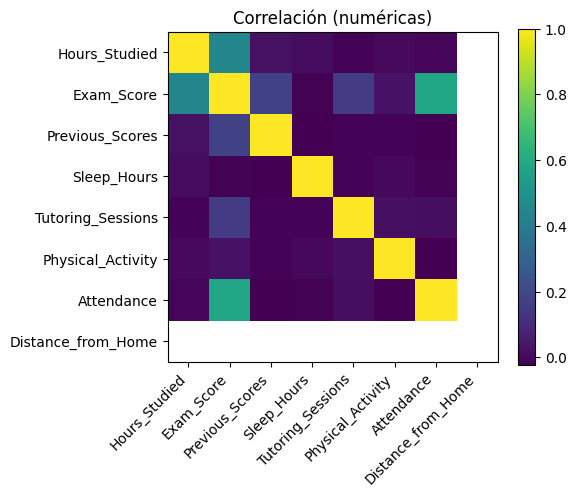

,Exam_Score
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Tutoring_Sessions,0.156525
Physical_Activity,0.027824
Sleep_Hours,-0.017022
Distance_from_Home,NaN


In [ ]:
# Mapa de correlaciones numéricas
# Tomamos solo columnas numéricas relevantes
num_cols = ["Hours_Studied","Exam_Score","Previous_Scores","Sleep_Hours",
            "Tutoring_Sessions","Physical_Activity","Attendance","Distance_from_Home"]
num_cols = [c for c in num_cols if c in df.columns]

corr_mat = df[num_cols].apply(pd.to_numeric, errors="coerce").corr()

plt.figure(figsize=(6,5))
plt.imshow(corr_mat, interpolation='nearest')
plt.title("Correlación (numéricas)")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.tight_layout()
plt.show()

corr_mat.sort_values("Exam_Score", ascending=False)[["Exam_Score"]]


# **Visualización principal (dispersión)**
Propósito: Responder la pregunta guía con un scatter Hours_Studied vs Exam_Score.

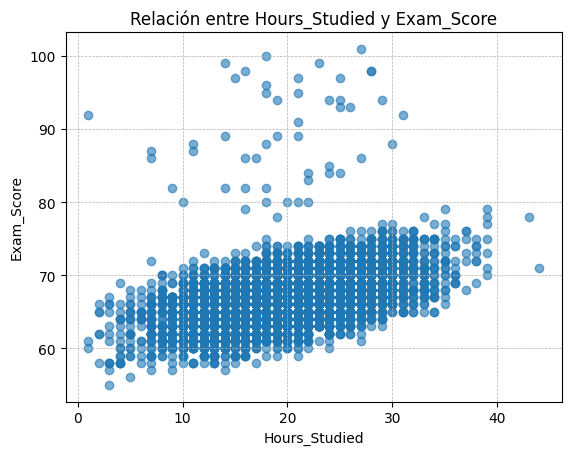

In [ ]:
# Celda 6 — Scatter principal (df_core_clean)
plt.figure()
plt.scatter(df_core_clean[study_col], df_core_clean[score_col], alpha=0.6)
plt.title(f"Relación entre {study_col} y {score_col}")
plt.xlabel(study_col)
plt.ylabel(score_col)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


# **Correlación y mini-lectura**
Propósito: Medir fuerza/dirección de la relación

In [ ]:
import textwrap

corr = df_core_clean[[study_col, score_col]].corr().iloc[0, 1]
trend = "positiva" if corr > 0.10 else ("negativa" if corr < -0.10 else "débil o nula")

summary = textwrap.dedent(f"""
Mini-lectura (borrador):
- La media de {score_col} es {score_mean:.1f} y su varianza muestral es {score_var:.1f}.
- La media de {study_col} es {study_mean:.1f} y su varianza muestral es {study_var:.1f}.
- La correlación entre {study_col} y {score_col} es {corr:.2f}, lo que sugiere una relación {trend}.
""").strip()

print(summary)


Mini-lectura (borrador):
- La media de Exam_Score es 67.2 y su varianza muestral es 15.1.
- La media de Hours_Studied es 20.0 y su varianza muestral es 35.9.
- La correlación entre Hours_Studied y Exam_Score es 0.45, lo que sugiere una relación positiva.


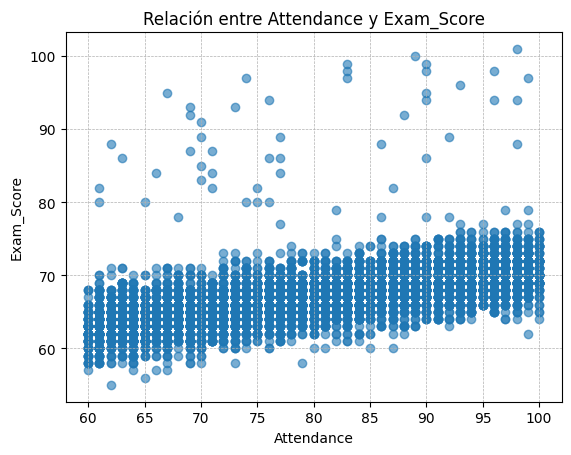

Correlación Attendance vs Exam_Score: 0.581


In [ ]:
#Scatter de Exam_Score vs la siguiente variable con mayor correlación
target = "Exam_Score"

cands = [c for c in corr_mat[target].drop(labels=[target, "Hours_Studied"]).index]
best = cands[np.nanargmax(np.abs(corr_mat[target].loc[cands]))] if cands else None

if best:
    df_sc = df[[best, target]].apply(pd.to_numeric, errors="coerce").dropna()
    plt.figure()
    plt.scatter(df_sc[best], df_sc[target], alpha=0.6)
    plt.title(f"Relación entre {best} y {target}")
    plt.xlabel(best); plt.ylabel(target)
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()
    print(f"Correlación {best} vs {target}: {df_sc[[best,target]].corr().iloc[0,1]:.3f}")



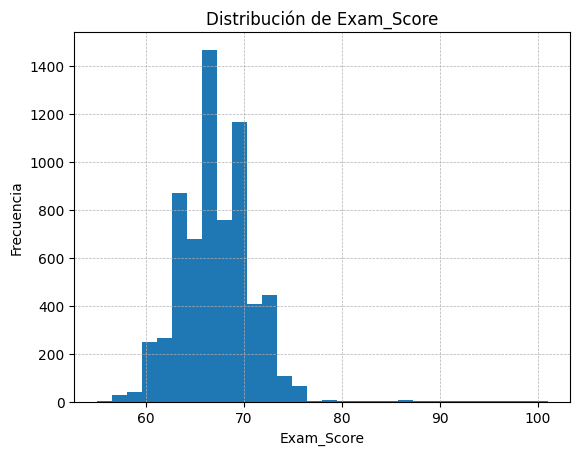

<Figure size 640x480 with 0 Axes>

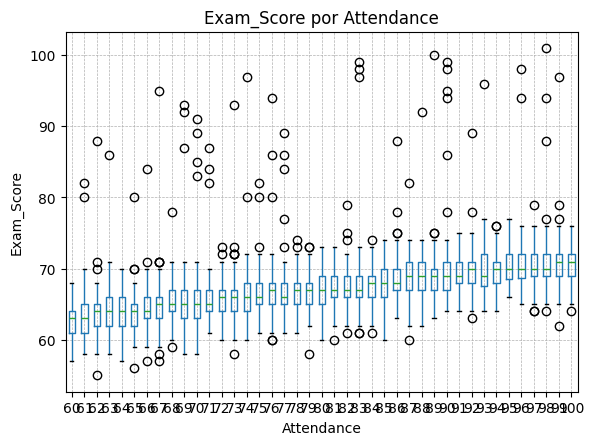

In [ ]:
# Histograma de Exam_Score
plt.figure()
df_core_clean[score_col].plot(kind="hist", bins=30)
plt.title(f"Distribución de {score_col}")
plt.xlabel(score_col)
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# Boxplot por Attendance si existe df_box
if 'df_box' in globals() and df_box is not None and "Attendance" in df_box.columns:
    plt.figure()
    df_box.boxplot(column=score_col, by="Attendance")
    plt.title(f"{score_col} por Attendance")
    plt.suptitle("")
    plt.xlabel("Attendance")
    plt.ylabel(score_col)
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()



In [ ]:
# Extraer insights
from pathlib import Path
import textwrap

DATA_DIR = Path("/content/")

reflection = textwrap.dedent(f"""
Reflexión (SenseAI):
Estos resultados permiten mostrar, en un panel simple, cómo el tiempo de estudio ({study_col})
se relaciona con el rendimiento ({score_col}). Si la relación es {trend}, SenseAI puede sugerir micro-tareas
o recordatorios cuando el tiempo de estudio baje, y priorizar refuerzos cuando las horas reportadas sean bajas.
En fases posteriores, se podría combinar este indicador con asistencia u otros hábitos para afinar recomendaciones.
""").strip()

report_path = DATA_DIR / "SenseAI_Fase1_Reporte.txt"
with open(report_path, "w", encoding="utf-8") as f:
    f.write("== Resumen de Fase 1 ==\n\n")
    f.write(summary + "\n\n")
    f.write(reflection + "\n")

print(f"📄 Borrador guardado en: {report_path}")

📄 Borrador guardado en: /content/SenseAI_Fase1_Reporte.txt


In [ ]:
# Exportar scatter a PNG (practicando como exportar las visualizaciones en imagenes)
fig_path = DATA_DIR / "scatter_hours_studied_vs_exam_score.png"
plt.figure()
plt.scatter(df_core_clean[study_col], df_core_clean[score_col], alpha=0.6)
plt.title(f"Relación entre {study_col} y {score_col}")
plt.xlabel(study_col)
plt.ylabel(score_col)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.savefig(fig_path, dpi=150, bbox_inches="tight")
plt.close()
print(f"🖼️ Figura guardada en: {fig_path}")


🖼️ Figura guardada en: /content/scatter_hours_studied_vs_exam_score.png
